In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Cellular automaton 1D, base libre (2 à 36), voisinage libre 

###### http://mathworld.wolfram.com/ElementaryCellularAutomaton.html

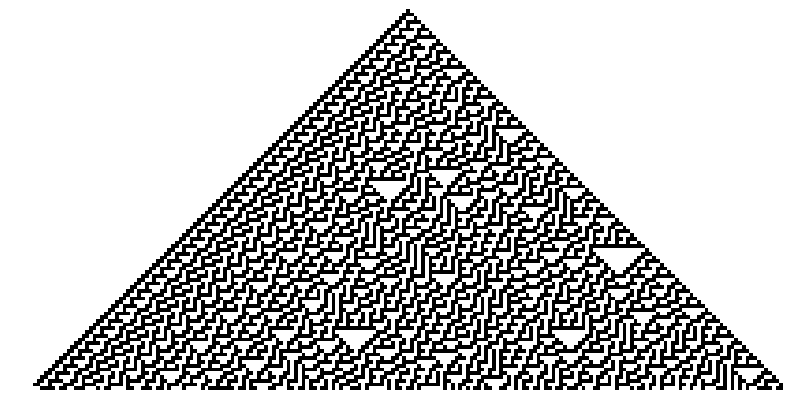

## Methods to create, implement and convert the rule to apply (base and offset)

In [3]:
def toBase(n, base):
    #Translate n (int) in the chosen base 
    
    digits = "0123456789abcdefghijklmnopqrstuvwxyz"
    tmp = []
    if n == 0 : 
        tmp.append(digits[0])
    while n:
        n, i = divmod(n, base)
        tmp.append(digits[i])
    
    inBase = "".join(tmp[::-1])
    return inBase

In [4]:
def randRule(base,offset): 
    #Create a random rule with the given base and the given neighborhood
    
    digits = "0123456789abcdefghijklmnopqrstuvwxyz"
    nbBytes = int("".join(np.full(2*offset+1,digits[base-1])),base)
    rule = "".join(np.random.choice(list(digits[:base]),nbBytes))
    return rule

In [5]:
def setRule(nbRule,offset,base):
    #Translate the chosen rule in the corresponding base
    
    digits = "0123456789abcdefghijklmnopqrstuvwxyz"
    dim = offset*2+1
    dimRule = int("".join(np.full(2*offset+1,digits[base-1])),base)
    
    rule = np.full(dimRule+1,'0')
    conv = [i for i in list(toBase(nbRule,base))]
    rule[:len(conv)] = conv[::-1]
    
    return rule

In [6]:
def applyRule(rule,neigh,base):
    # Apply the rule to the neighborhood
    
    newState = rule[int("".join(neigh),base)]
    
    return newState

In [7]:
def neigh(cells,offset,position):
    #Define the neighborhood as the cell position +/- offset
    #if the index is outside the width of the array, consider the space as a cylender
    
    minNeigh = [int(position-offset) if position >= offset else int(len(cells)-offset+position)][0]
    maxNeigh = [int(position+offset) if position < len(cells)-offset else int(-len(cells)+offset+position)][0]

    if (np.mean([minNeigh,maxNeigh])-position) == 0 :
        
        neigh =  cells[minNeigh:maxNeigh+1]

    else : 
        
        neigh =  np.hstack([cells[minNeigh:len(cells)],cells[0:maxNeigh+1]])

    return neigh

### Main methods

In [8]:
def step(cells,nbRule,offset,base):
    # Apply the rule on the array
    
    cells = [toBase(int(i),base) for i in cells]
    newCells = np.copy(cells)
    rule = setRule(nbRule,offset,base)    
    for i in np.linspace(0,len(newCells)-1,len(newCells)):
        i = int(i)
        
        nb = neigh(cells,offset,i)
        
        newCells[i] = applyRule(rule,nb,base)
    
    return [int(i,base) for i in newCells]

In [9]:
def lifetime(cells,nbRule,offset,base,time):
    # iteration of the step
    
    for i in range(time):
        
        new = step(cells[i],nbRule,offset,base)
        cells = np.vstack([cells,new])
       
    return cells

## Main

### Base 2, offset 1, variations

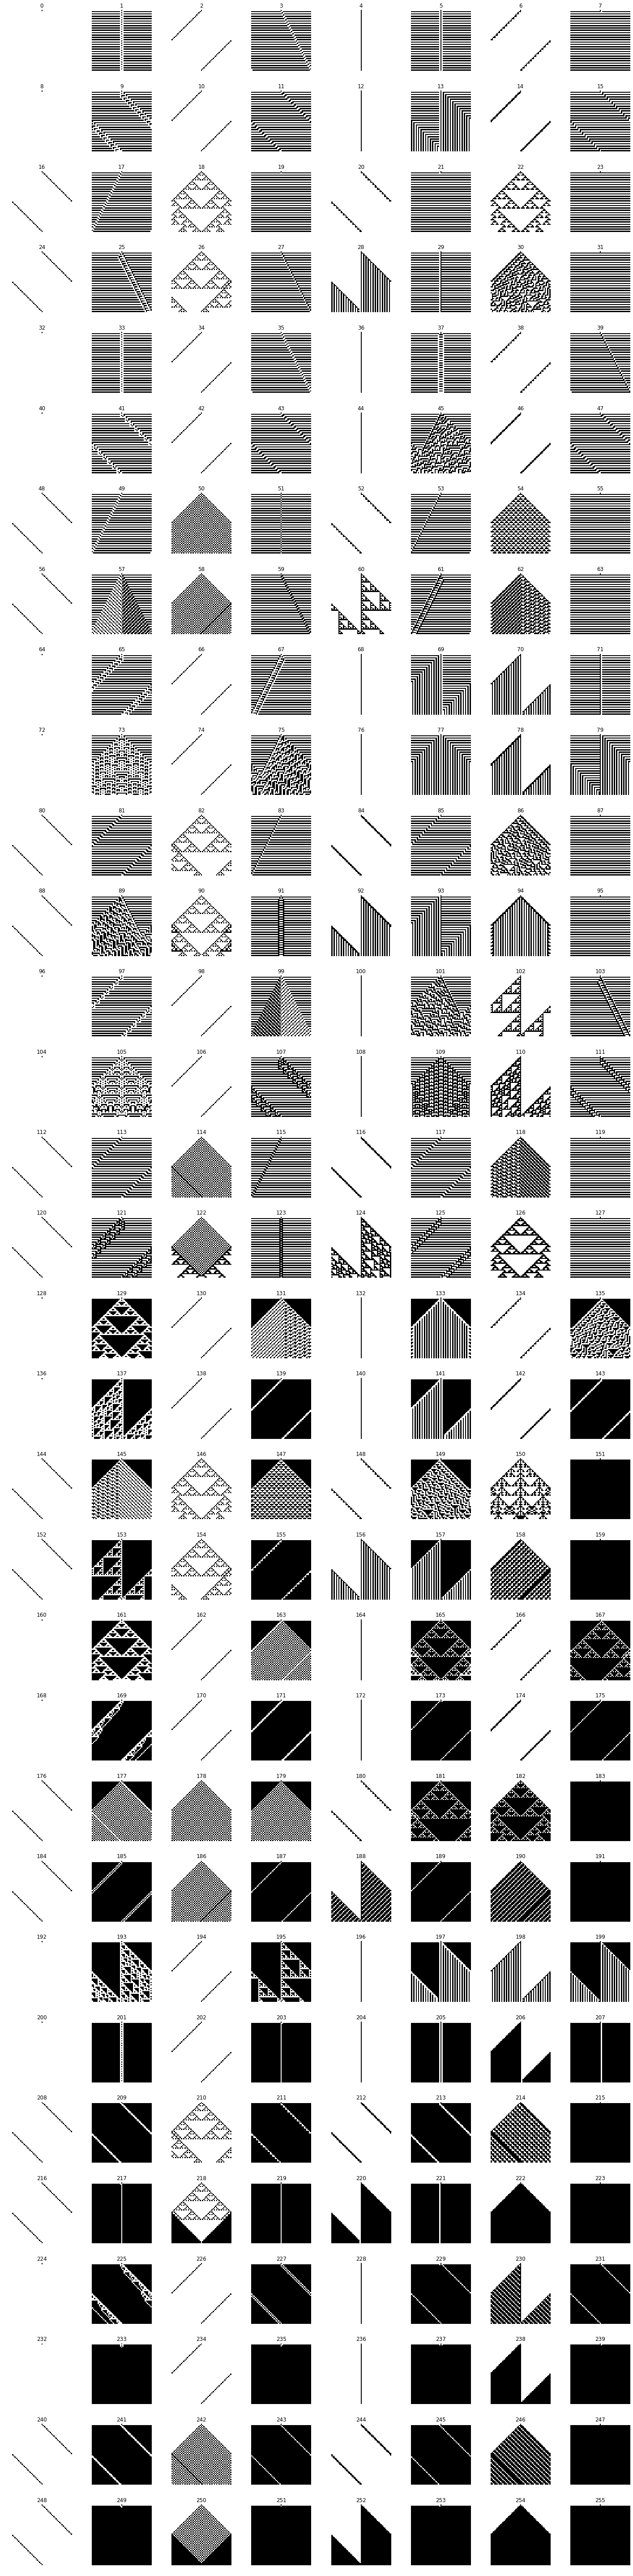

In [10]:
base = 2 #base to convert in - nb of levels
offset = 1 #size of the considered byte
cells = np.zeros((1,51))
cells[0,25]=1

f,ax = plt.subplots(32,8,figsize=(20,80))

for nbRule in range(256):
    fin = lifetime(cells,nbRule,offset,base,51)
    i = int(nbRule//8)
    j = int(nbRule%8)
    ax[i,j].imshow(fin,cmap='Greys')
    ax[i,j].set_title(nbRule)
    ax[i,j].axis('off')
    
plt.tight_layout()
plt.show()

### Base 3, offset 1, random rule

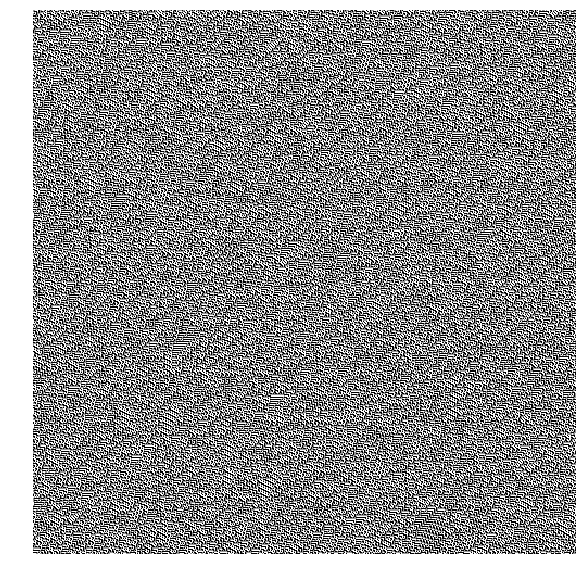

In [11]:
base = 3 #base to convert in - nb of levels
offset = 1 #size of the considered byte

levels = np.linspace(0,base-1,base)# possible values in the base
cells = np.array(np.random.choice(levels,(1,500))) # random initial cell in the base
nbRule = int(randRule(base,offset),base) # random rule

fin = lifetime(cells,nbRule,offset,base,500)

plt.figure(figsize=(10,10))
plt.imshow(fin,cmap='Greys')
plt.axis('off')
plt.show()

### Base 2, offset 2, random rule

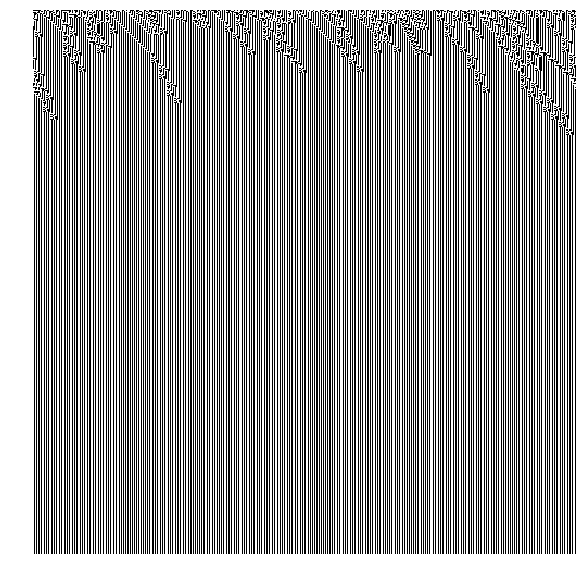

In [12]:
base = 2 #base to convert in - nb of levels
offset = 2 #size of the considered byte
levels = np.linspace(0,base-1,base)# possible values in the base
cells = np.array(np.random.choice(levels,(1,500))) # random initial cell in the base
nbRule = int(randRule(base,offset),base) # random rule

fin = lifetime(cells,nbRule,offset,base,500)

plt.figure(figsize=(10,10))
plt.imshow(fin,cmap='Greys')
plt.axis('off')
plt.show()